In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!wget https://raw.githubusercontent.com/Darnivo/MLSem4/main/train.csv

--2024-04-03 18:20:30--  https://raw.githubusercontent.com/Darnivo/MLSem4/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2024-04-03 18:20:30 (4.89 MB/s) - ‘train.csv.2’ saved [61194/61194]



In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.dropna(subset=['Embarked'], inplace=True)

In [ ]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [ ]:
data["Cabin"] = data["Cabin"].fillna("U")
data["Cabin"] = data["Cabin"].map(lambda x: x[0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [ ]:
encode = preprocessing.LabelEncoder()

data["Sex"] = encode.fit_transform(data["Sex"])
data["Cabin"] = encode.fit_transform(data["Cabin"])
data["Embarked"] = encode.fit_transform(data["Embarked"])

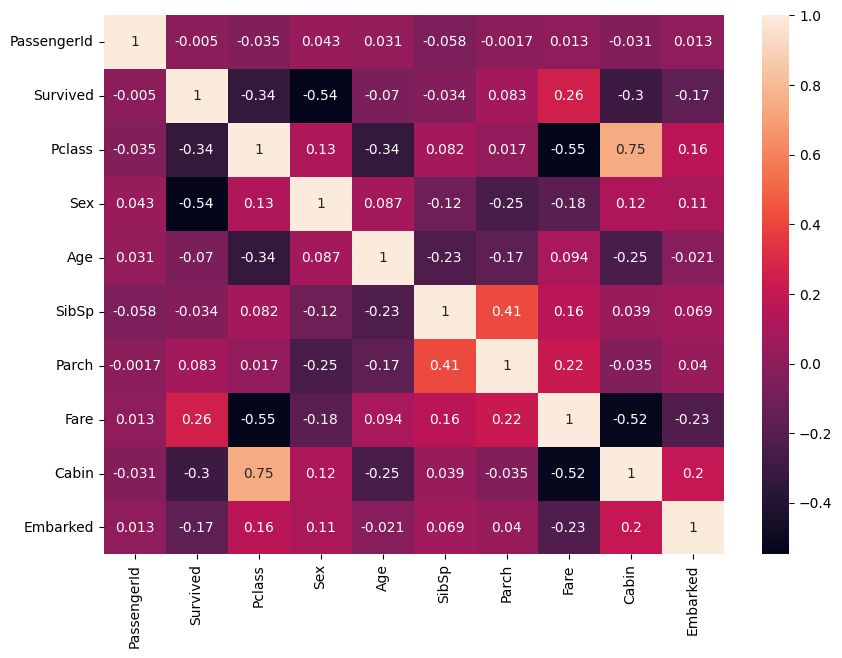

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_columns].corr()
sb.heatmap(data = corr_matrix, annot = True)
# sb.heatmap(data.corr(), annot = True)
plt.rcParams["figure.figsize"] = [10,7]
plt.show()

In [ ]:
X = data[["Pclass", "Sex", "Age", "Cabin"]]
Y = data["Survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.3, random_state = 100)

In [ ]:
LGR = LogisticRegression().fit(XTrain, YTrain)
CTest = LGR.predict(XTest)
CTrain = LGR.predict(XTrain)
print("Test set accuracy : ", metrics.accuracy_score(YTest, CTest))
print("Train set accuracy : ", metrics.accuracy_score(YTrain, CTrain))

Test set accuracy :  0.7790262172284644
Train set accuracy :  0.8070739549839229


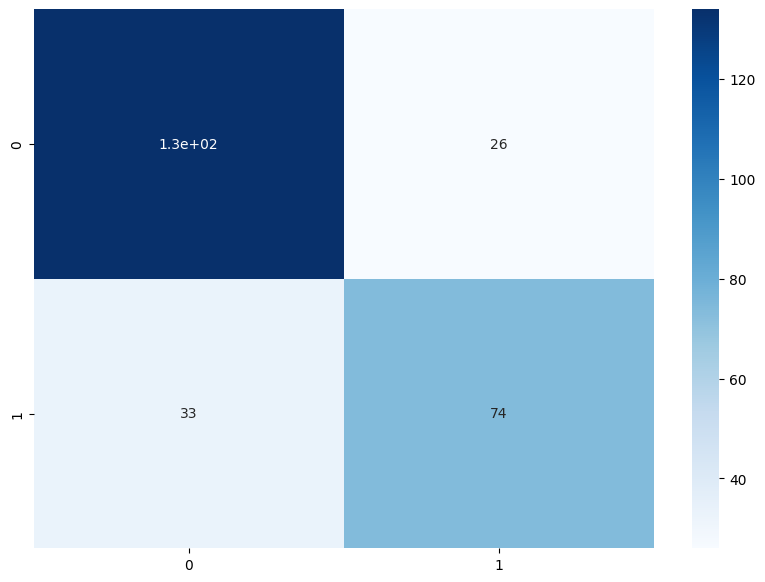

In [ ]:
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

In [ ]:
nNot, nSurvived = data["Survived"].value_counts()
dataSurvived = data[data["Survived"] == 1]
dataNot = data[data["Survived"] == 0]

In [ ]:
dataNot = dataNot.sample(nSurvived)
dataTitanicUResampled = pd.concat([dataNot, dataSurvived], axis=0)
dataTitanicUResampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 722 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  680 non-null    int64  
 1   Survived     680 non-null    int64  
 2   Pclass       680 non-null    int64  
 3   Name         680 non-null    object 
 4   Sex          680 non-null    int64  
 5   Age          680 non-null    float64
 6   SibSp        680 non-null    int64  
 7   Parch        680 non-null    int64  
 8   Ticket       680 non-null    object 
 9   Fare         680 non-null    float64
 10  Cabin        680 non-null    int64  
 11  Embarked     680 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 69.1+ KB


In [ ]:
dataSurvived = dataSurvived.sample(nNot, replace=True)
dataTitanicOResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicOResampled["Survived"].value_counts())
print(dataTitanicOResampled.info())
print(dataTitanicOResampled.describe())

Survived
1    549
0    340
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 722 to 689
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    int64  
 11  Embarked     889 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 90.3+ KB
None
       PassengerId    Survived      Pclass         Sex         Age  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    447.109111    0.617548    2.173228    0.5

In [ ]:
XU = dataTitanicUResampled[["Pclass", "Sex", "Age", "Cabin"]]
YU = dataTitanicUResampled["Survived"]

XO = dataTitanicOResampled[["Pclass", "Sex", "Age", "Cabin"]]
YO = dataTitanicOResampled["Survived"]

XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.2, random_state = 100)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.2, random_state = 100)

In [ ]:
DSTU = DecisionTreeClassifier(criterion="gini").fit(XUTrain, YUTrain)
DSTO = DecisionTreeClassifier(criterion="gini").fit(XOTrain, YOTrain)

CUTest  = DSTU.predict(XUTest)
COTest  = DSTO.predict(XOTest)

CUTrain  = DSTU.predict(XUTrain)
COTrain  = DSTO.predict(XOTrain)

print("Train set under acc: ", metrics.accuracy_score(YUTrain, CUTrain))
print("Test set under acc: ", metrics.accuracy_score(YUTest, CUTest))

print("Train set over acc: ", metrics.accuracy_score(YOTrain, COTrain))
print("Test set over acc: ", metrics.accuracy_score(YOTest, COTest))

Train set under acc:  0.9007352941176471
Test set under acc:  0.7941176470588235
Train set over acc:  0.8987341772151899
Test set over acc:  0.8089887640449438


In [ ]:
parameters = {'criterion':('gini','entropy', 'log_loss'),
              'splitter':('best','random'),
              'max_depth':[6,8,10,12,14,18],}

DSTO  = DecisionTreeClassifier()
model = GridSearchCV(DSTO, parameters).fit(XOTrain, YOTrain)

COTest  = model.predict(XOTest)
COTrain  = model.predict(XOTrain)

print("Train set over acc: ", metrics.accuracy_score(YOTrain, COTrain))
print("Test set over acc: ", metrics.accuracy_score(YOTest, COTest))
print(model.best_params_)

Train set over acc:  0.8790436005625879
Test set over acc:  0.7865168539325843
{'criterion': 'log_loss', 'max_depth': 10, 'splitter': 'best'}


Test Accuracy :  0.7865168539325843


<Axes: >

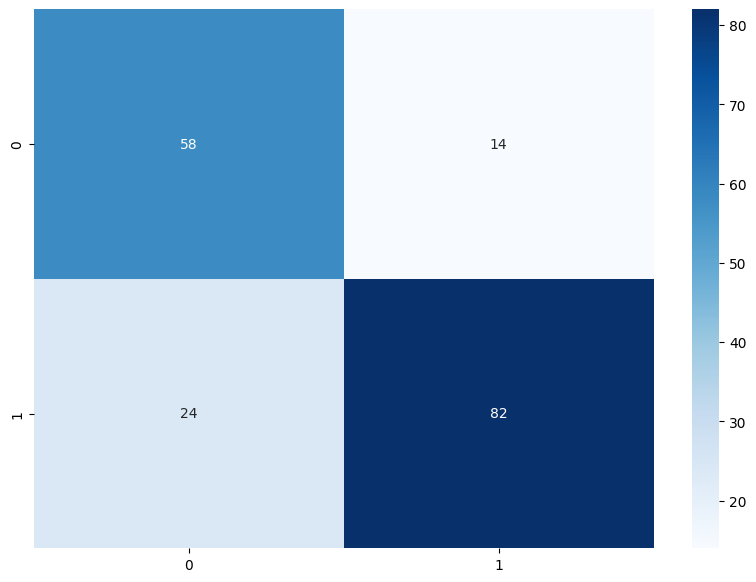

In [ ]:
print("Test Accuracy : ", metrics.accuracy_score(YOTest, COTest))
cf_matrix_DST = metrics.confusion_matrix(YOTest, COTest)
sb.heatmap(cf_matrix_DST, cmap="Blues", annot = True)